In [1]:
# Setup
import pandas as pd
import numpy as np

In [2]:
#setup to download data directly from the databank
import pandas_datareader
import datetime

In [3]:
#setup to download data directly from world data bank
from pandas_datareader import wb

In [4]:
#define countries we are looking for
countries = ["CN","JP","BR","US","DK","ES","TM","IN","NG"]

In [5]:
#define indicator
indicators = {"NY.GDP.PCAP.KD":"GDP per capita", "NY.GDP.MKTP.CD":"GDP(current US $)", "SP.POP.TOTL":"Population total", 
              "SP.URB.TOTL.IN.ZS":"Urban Population in %", "SP.DYN.TFRT.IN":"Fertility Rate", "SE.ADT.LITR.ZS": "Literacy rate, adult total in %" }

In [6]:
#example download world data bank shown in the lecture
data_wb = wb.download(indicator= indicators, country= countries, start=1990, end=2017)
data_wb = data_wb.rename(columns = {"NY.GDP.PCAP.KD":"gdp_pC","NY.GDP.MKTP.CD":"gdp", "SP.POP.TOTL":"pop", "SP.URB.TOTL.IN.ZS":"urban_pop%", 
                                    "SP.DYN.TFRT.IN":"frt", "SE.ADT.LITR.ZS":"litr"})
data_wb = data_wb.reset_index()
data_wb.head(-5)

,country,year,gdp_pC,gdp,pop,urban_pop%,frt,litr
0,Brazil,2017,10888.982385,2.055506e+12,209288278,86.309,NaN,NaN
1,Brazil,2016,10868.653444,1.793989e+12,207652865,86.042,1.7260,NaN
2,Brazil,2015,11351.565748,1.802214e+12,205962108,85.770,1.7400,92.04790
3,Brazil,2014,11870.148408,2.455994e+12,204213133,85.492,1.7530,91.72943
4,Brazil,2013,11915.417054,2.472807e+12,202408632,85.209,1.7650,91.48424
5,Brazil,2012,11673.770536,2.465189e+12,200560983,84.923,1.7770,91.33785
6,Brazil,2011,11560.418751,2.616202e+12,198686688,84.631,1.7900,91.41124
7,Brazil,2010,11224.154083,2.208872e+12,196796269,84.335,1.8050,90.37918
8,Brazil,2009,10538.778282,1.667020e+12,194895996,84.044,1.8240,90.29821
9,Brazil,2008,10656.869466,1.695825e+12,192979029,83.749,1.8510,90.03662


IMPORTANT: Change the following code to your's and if you run it twice you need to change the name or we figure sth out on how to overwrite the existing one

In [7]:
# save datasheet as excel (just to see it)_index=false to avoid saving the index
writer = pd.ExcelWriter('pandas_simple.xlsx', engine='xlsxwriter')
#data_wb.to_excel(r"C:\Users\BKirs\OneDrive\03_Master\07_IntroToProgramming\DataProject_IP\projects-2019-tba\dataproject\dataproject\Dataproject_Bianca\data_wb1.xlsx")

#Bianca: simply in the same folder
data_wb.to_excel(r"./data_wb1.xlsx")

In [8]:
#Tonje 
data_wb.dtypes

country        object
year           object
gdp_pC        float64
gdp           float64
pop             int64
urban_pop%    float64
frt           float64
litr          float64
dtype: object

IMPORTANT: Find a way to combine the 2 decimals and the format of floats

In [10]:
# Bianca
#make the data pretty:
pd.options.display.float_format = '{:,}'.format

round(data_wb.head(),2)

,country,year,gdp_pC,gdp,pop,urban_pop%,frt,litr
0,Brazil,2017,"10,888.98","2,055,505,502,224.73",209288278,86.31,nan,nan
1,Brazil,2016,"10,868.65","1,793,989,048,409.29",207652865,86.04,1.73,nan
2,Brazil,2015,"11,351.57","1,802,214,373,741.32",205962108,85.77,1.74,92.05
3,Brazil,2014,"11,870.15","2,455,993,625,159.37",204213133,85.49,1.75,91.73
4,Brazil,2013,"11,915.42","2,472,806,919,901.67",202408632,85.21,1.76,91.48


In [15]:
# Bianca
#new variable for gdp
data_wb['gdp_in_bil'] = data_wb['gdp']/1000000000

round(data_wb.head(),2) #just to check

KeyError: 'gdp'

In [14]:
# Bianca
#drop old variable for gdp
del data_wb['gdp']
round(data_wb.head(),2)

#drop old GDP
#data_wb.drop(['gdp'], axis = 1, inplace = True)

#check that its droped 
#data_wb.head(5)

#new interpretation of GDP: GDP (current $US), measured in 100 millions -> change description

KeyError: 'gdp'

In [16]:
data_wb.shape #how many obs and variables

(252, 8)

In [17]:
#summary statistics
data_wb.describe()

,gdp_pC,pop,urban_pop%,frt,litr,gdp_in_bil
count,252.0,252.0,252.0,243.0,37.0,252.0
mean,"21,233.39634238703","353,535,362.6825397",62.67078174603172,2.500788065843621,86.99691945945946,"2,711.9587098137304"
std,"20,848.112381275565","464,366,860.29945743",22.30939273104207,1.429511972921093,15.3933906871932,"4,160.880644975223"
min,530.894738000648,"3,683,966.0",25.547,1.13,48.22207,2.37875997544506
25%,"2,131.2548240995525","40,015,504.75",42.5715,1.5470000000000002,88.61624,275.6118545847615
50%,"9,117.394508632831","133,683,074.5",76.0985,1.926,91.48424,684.5027534737676
75%,"42,252.611495064804","309,914,885.75",81.5765,2.8605,97.75069,"3,939.73453781613"
max,"61,582.166068968","1,386,395,000.0",91.535,6.49,99.7,"19,390.604"


Maybe use a gdp in Millions and then do sth to decimals

In [18]:
# detect for missing data
## count missing data
data_wb.isnull().sum().sum()

224

In [19]:
## number of observations
data_wb.count()

country       252
year          252
gdp_pC        252
pop           252
urban_pop%    252
frt           243
litr           37
gdp_in_bil    252
dtype: int64

In [20]:
## missing value of each variable
data_wb.isnull().sum()

country         0
year            0
gdp_pC          0
pop             0
urban_pop%      0
frt             9
litr          215
gdp_in_bil      0
dtype: int64

In [21]:
# drop litr OR DELETE? AS BF?
data_wb.drop(['litr'], axis = 1, inplace = True)

In [23]:
#search for the nine missing values in frt
round(data_wb.groupby('year').mean(),2)

,gdp_pC,pop,urban_pop%,frt,gdp_in_bil
year,,,,,
1990,"17,322.45","296,754,760.0",57.06,2.98,"1,220.28"
1991,"17,480.06","301,483,292.67",57.39,2.92,"1,308.71"
1992,"17,614.3","306,083,205.0",57.71,2.86,"1,377.01"
1993,"17,609.77","310,600,879.44",58.04,2.79,"1,465.41"
1994,"18,033.67","315,117,504.67",58.36,2.73,"1,598.08"
1995,"18,406.36","319,614,237.22",58.7,2.67,"1,757.44"
1996,"18,865.59","324,075,633.0",59.06,2.61,"1,768.65"
1997,"19,293.24","328,551,075.67",59.42,2.57,"1,788.61"
1998,"19,603.76","332,962,293.0",59.78,2.53,"1,809.05"


In [35]:
#show frt only for 2017
round(data_wb.loc[data_wb['year'] == "2017", :].head(-1),2)

,country,year,gdp_pC,pop,urban_pop%,frt,gdp_in_bil


In [31]:
# drop the year for which the data is missing 
I = data_wb['year'] == "2017"
data_wb.drop(data_wb[I].index, inplace = True)
# => data cleaning done

In [32]:
#summary statistics
round(data_wb.describe(),2)

,gdp_pC,pop,urban_pop%,frt,gdp_in_bil
count,243.0,243.0,243.0,243.0,243.0
mean,"21,091.48","351,664,843.62",62.44,2.5,"2,634.6"
std,"20,765.76","461,984,890.15",22.36,1.43,"4,039.98"
min,530.89,"3,683,966.0",25.55,1.13,2.38
25%,"2,068.46","39,973,620.5",42.11,1.55,271.04
50%,"8,924.9","131,972,533.0",76.1,1.93,655.42
75%,"42,214.99","308,054,975.0",81.39,2.86,"3,746.61"
max,"61,174.55","1,378,665,000.0",91.46,6.49,"18,624.47"


In [33]:
data_wb.shape

(243, 7)

In [34]:
data_wb.count()
#=>data cleaning finished

country       243
year          243
gdp_pC        243
pop           243
urban_pop%    243
frt           243
gdp_in_bil    243
dtype: int64

In [28]:
# make some cool groupby things see lecture basic_data
##empl.groupby('municipality')['e'].mean().head(10)
##empl.groupby('year')['e'].mean().plot
# demean to compare it better
##stocks2.groupby('firm')['close_demeaned'].plot(legend=True); 
##plt.title('Stock price: deviation from time-average'); 
# perform summary statistics
## nameofdataset.describe()
# maybe create an interactive table for each country
##see load_save_and_structure_data
#correlation table?
# maybe perform a simple regression
# world maps as diagramm

Fertility rate//
Group B//
Change the number

In [43]:
#Marie: groupby country
round(data_wb.groupby('country').mean(),2)

##overview shows countries with a high gdp per capita have a low fertility rate. countries with a high gdp per capita have a huge 
##share of urban population

,gdp_pC,pop,urban_pop%,frt,gdp_in_bil
country,,,,,
Brazil,"9,595.04","180,812,509.93",81.31,2.18,"1,183.42"
China,"2,945.46","1,276,308,703.7",40.55,1.65,"3,606.57"
Denmark,"54,864.22","5,401,958.63",85.86,1.76,238.79
India,994.89,"1,104,088,507.19",28.89,3.11,935.46
Japan,"42,941.81","126,685,574.48",83.94,1.4,"4,715.85"
Nigeria,"1,820.09","135,188,798.89",38.11,6.03,203.29
Spain,"28,067.42","42,809,614.85",77.17,1.28,972.34
Turkmenistan,"3,568.09","4,675,784.89",46.95,3.1,13.47
United States,"45,026.29","289,012,140.0",79.19,1.99,"11,842.19"


 <span style="font-family: Arial; font-size:2.5em;color:black"> Interactive plot </p>

Now, we want to make an interactive plot which displays the development of GDP per capita over time, 
for the different countries.  

First, import the necessary packages and tools: 

In [36]:
#Tonje 
import matplotlib.pyplot as plt
%matplotlib inline 
from ipywidgets import interact, interactive, fixed, interact_manual 
import ipywidgets as widgets 


Then, define the relevant variables in a ways which simplifies the coding: 

In [37]:
#Tonje 
country=data_wb["country"]
year=data_wb["year"]
gdp_pC=data_wb["gdp_pC"]


Create a function constructing a figure: 

In [38]:
#Tonje 
def interactive_figure(country, data_wb):
    """define an interactive figure that uses countries and the dataframe as inputs """
    
    data_country = data_wb[data_wb.country == country]
    year = data_country.year
    gdp_pC = data_country.gdp_pC
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    ax.plot(year, gdp_pC)
    ax.set_xlabel("Years")
    ax.set_ylabel("GDP per Capita")
    plt.xticks(rotation=90)
    plt.gca().invert_xaxis()



Make it interactive with a drop down menu:

In [44]:
#Tonje
widgets.interact(interactive_figure,
    year = widgets.fixed(year),
    data_wb = widgets.fixed(data_wb),
    country=widgets.Dropdown(description="Country", options=data_wb.country.unique()),
    gdp_pC=widgets.fixed(gdp_pC)
);

interactive(children=(Dropdown(description='Country', options=('Brazil', 'China', 'Denmark', 'Spain', 'India',…

We can see that the overall trend for the selected countries is increasing GDP per capita.
However, for the Western countries and Japan we can see the trace of the 2008 financial crisis.  For Spain, 
one of the countries that suffered most from this crisis, the dip is particularly visible. It is also worth noticing that China fared better than most industustrial nations during this crisis. This is partly due to Chinas closed nature, which made them less vulnerable to financial friction in the world economy. 

 <span style="font-family: Arial; font-size:2.5em;color:black"> Data visualization </p>

Text(0, 0.5, 'Avg. annual fertility rate')

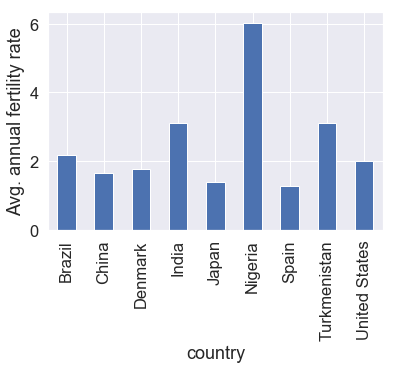

In [48]:
ax = data_wb.groupby('country').frt.mean().plot(kind='bar')
ax.set_ylabel('Avg. annual fertility rate')

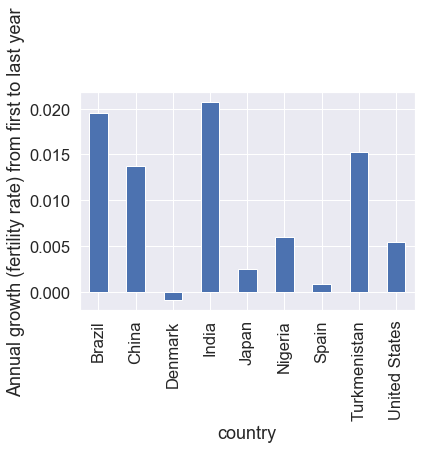

In [49]:
#reinnehmen Marie
def annual_growth(x): 
    x_last    = x.values[-1]
    x_first   = x.values[0]
    num_years = len(x)
    
    growth_annualized = (x_last/x_first)**(1/num_years) - 1.0
    return growth_annualized

ax = data_wb.groupby('country')['frt'].agg(annual_growth).plot(kind='bar')
ax.set_ylabel('Annual growth (fertility rate) from first to last year'); 

 <span style="font-family: Arial; font-size:2.5em;color:black"> World Map </p>

In [50]:
# Bianca
# try folium circle
# Python God: https://www.kaggle.com/rachan/how-to-folium-for-maps-heatmaps-time-analysis
#https://blog.prototypr.io/interactive-maps-with-python-part-1-aa1563dbe5a9

import folium

In [51]:
#Bianca
data_wb.groupby('country').mean()

,gdp_pC,pop,urban_pop%,frt,gdp_in_bil
country,,,,,
Brazil,"9,595.044474040149","180,812,509.92592594",81.30911111111111,2.179925925925926,"1,183.4156320703592"
China,"2,945.4643286685964","1,276,308,703.7037036",40.55207407407407,1.6533703703703704,"3,606.573560972753"
Denmark,"54,864.22462146124","5,401,958.62962963",85.86040740740742,1.7607407407407407,238.78650975806516
India,994.891572655445,"1,104,088,507.1851852",28.891740740740747,3.113185185185185,935.4587895314128
Japan,"42,941.81097519505","126,685,574.48148148",83.9354074074074,1.3951851851851853,"4,715.8468104487365"
Nigeria,"1,820.0941732234444","135,188,798.8888889",38.11422222222223,6.028370370370372,203.28955441223545
Spain,"28,067.420728963334","42,809,614.85185185",77.1717037037037,1.2848148148148146,972.3433364964282
Turkmenistan,"3,568.0943748309674","4,675,784.888888889",46.94514814814815,3.099777777777777,13.465100600194567
United States,"45,026.29087115506","289,012,140.0",79.18559259259261,1.9917222222222226,"11,842.189814814818"


In [52]:
#Bianca
row_indexes=data_wb[data_wb['country']== 'Brazil'].index
data_wb.loc[row_indexes,'Lat']= -14.2350
data_wb.loc[row_indexes,'Lon']= -51.9253

row_indexes=data_wb[data_wb['country']== 'China'].index
data_wb.loc[row_indexes,'Lat']= 33.5449
data_wb.loc[row_indexes,'Lon']= 103.149

row_indexes=data_wb[data_wb['country']== 'Denmark'].index
data_wb.loc[row_indexes,'Lat']= 56.2639
data_wb.loc[row_indexes,'Lon']= 9.5018

row_indexes=data_wb[data_wb['country']== 'Spain'].index
data_wb.loc[row_indexes,'Lat']= 40.4637
data_wb.loc[row_indexes,'Lon']= -3.7492

row_indexes=data_wb[data_wb['country']== 'India'].index
data_wb.loc[row_indexes,'Lat']= 20.5937
data_wb.loc[row_indexes,'Lon']= 78.9629

row_indexes=data_wb[data_wb['country']== 'Japan'].index
data_wb.loc[row_indexes,'Lat']= 36.2048
data_wb.loc[row_indexes,'Lon']= 138.2529

row_indexes=data_wb[data_wb['country']== 'Nigeria'].index
data_wb.loc[row_indexes,'Lat']= 9.0820
data_wb.loc[row_indexes,'Lon']= 8.6753

row_indexes=data_wb[data_wb['country']== 'Turkmenistan'].index
data_wb.loc[row_indexes,'Lat']= 38.9697
data_wb.loc[row_indexes,'Lon']= 59.5563

row_indexes=data_wb[data_wb['country']== 'United States'].index
data_wb.loc[row_indexes,'Lat']= 37.0902
data_wb.loc[row_indexes,'Lon']= -95.7129

In [53]:
round(data_wb,2)

,country,year,gdp_pC,pop,urban_pop%,frt,gdp_in_bil,Lat,Lon
1,Brazil,2016,"10,868.65",207652865,86.04,1.73,"1,793.99",-14.24,-51.93
2,Brazil,2015,"11,351.57",205962108,85.77,1.74,"1,802.21",-14.24,-51.93
3,Brazil,2014,"11,870.15",204213133,85.49,1.75,"2,455.99",-14.24,-51.93
4,Brazil,2013,"11,915.42",202408632,85.21,1.76,"2,472.81",-14.24,-51.93
5,Brazil,2012,"11,673.77",200560983,84.92,1.78,"2,465.19",-14.24,-51.93
6,Brazil,2011,"11,560.42",198686688,84.63,1.79,"2,616.2",-14.24,-51.93
7,Brazil,2010,"11,224.15",196796269,84.34,1.8,"2,208.87",-14.24,-51.93
8,Brazil,2009,"10,538.78",194895996,84.04,1.82,"1,667.02",-14.24,-51.93
9,Brazil,2008,"10,656.87",192979029,83.75,1.85,"1,695.82",-14.24,-51.93
10,Brazil,2007,"10,244.27",191026637,83.45,1.88,"1,397.08",-14.24,-51.93


In [55]:
#Bianca works
#all in one

# Make an empty map
map = folium.Map(location=[0,0], tiles="Mapbox Bright", zoom_start=2)
#converted_value = getattr(value, "tolist", lambda x=value: x)()

selectedyear = 2010 #Select your preferred year
selectedvariable = 'gdp_pC' #select yout preferred variable

year_overview = data_wb.loc[data_wb['year']== str(selectedyear)] #selectedyear for a dropdown with used year
year_overview

# Make an empty map
map = folium.Map(location=[0,0], tiles="Mapbox Bright", zoom_start=2)
#converted_value = getattr(value, "tolist", lambda x=value: x)()


# I can add marker one by one on the map
for i in range(0,len(year_overview)):
    folium.Circle(
        location=[year_overview.iloc[i]['Lat'], year_overview.iloc[i]['Lon']],
        #popup=locations2016_gdp_pC.iloc[i]['country'],
        radius=year_overview.iloc[i][selectedvariable]*10, #the smaller the original number, the higher the radius should be chosen
        color='green',
        fill=True
    ).add_to(map)


map

In [57]:
#Bianca
#saving in a file
map.save('./map.py')

In [75]:
data_wb.drop(['Lat','Lon'], axis = 1, inplace = True)

<span style="font-family: Arial; font-size:2.5em;color:black"> Average Annual Fertility Rate per Country</p>

Text(0, 0.5, 'Avg. annual fertility rate')

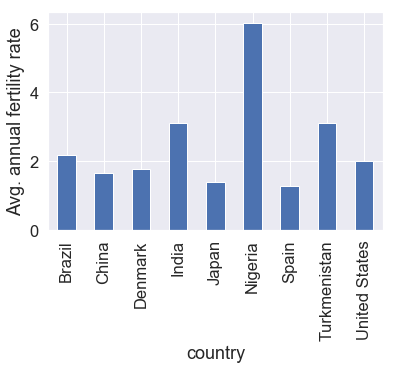

In [76]:
#reinnehmen Marie
ax = data_wb.groupby('country').frt.mean().plot(kind='bar')
ax.set_ylabel('Avg. annual fertility rate')

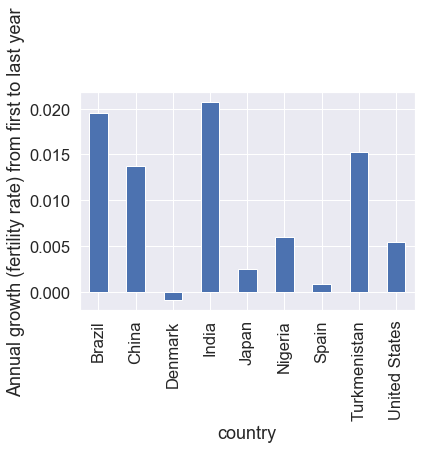

In [77]:
#reinnehmen Marie
def annual_growth(x): 
    x_last    = x.values[-1]
    x_first   = x.values[0]
    num_years = len(x)
    
    growth_annualized = (x_last/x_first)**(1/num_years) - 1.0
    return growth_annualized

ax = data_wb.groupby('country')['frt'].agg(annual_growth).plot(kind='bar')
ax.set_ylabel('Annual growth (fertility rate) from first to last year'); 

In [78]:
#ab hier neuer Scheiß Marie
data_wb.dtypes

gdp_pC        float64
pop             int64
urban_pop%    float64
frt           float64
gdp_in_bil    float64
dtype: object

In [79]:
#Marie convert year into float
data_wb['year'] = data_wb.year.astype(float)

AttributeError: 'DataFrame' object has no attribute 'year'

In [80]:
#try whether it worked out
data_wb.dtypes

gdp_pC        float64
pop             int64
urban_pop%    float64
frt           float64
gdp_in_bil    float64
dtype: object

In [81]:
#Marie das ist wichtig!!!! Do it with the TA
data_wb = data_wb.set_index(["year", "country"])

KeyError: 'year'

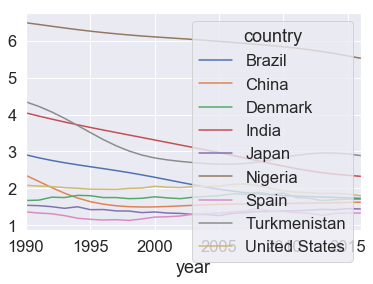

In [82]:
#plot fertility rate over the years
data_wb.unstack('country')['frt'].plot()

In [83]:
#data year and country are index
data_wb.dtypes

gdp_pC        float64
pop             int64
urban_pop%    float64
frt           float64
gdp_in_bil    float64
dtype: object

 <span style="font-family: Arial; font-size:2.5em;color:black"> Correlation Table </p>

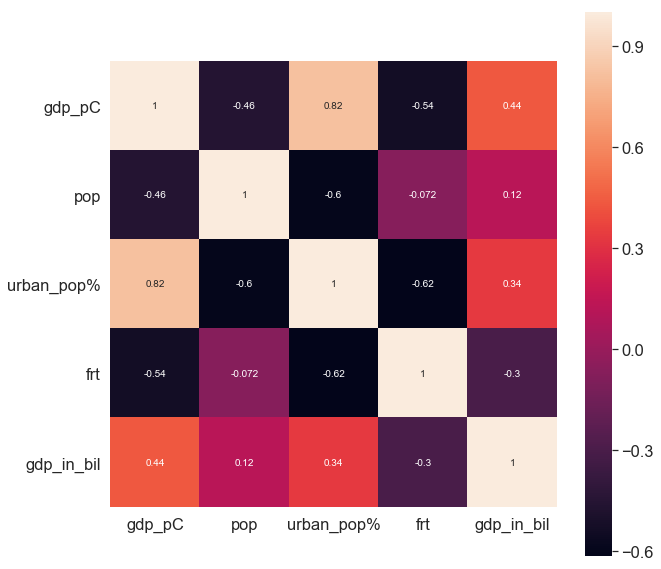

In [84]:
import seaborn as sns
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(data_wb.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

This gives a good indication for what to expect from the regression. 
As expected, GDP per capita is negatively correlated to population and fertility rate, and 
positively correlated to urban population.

Strong correlation between the explanatory variables might give colinearity problems (?) 

In [47]:
#Marie
#index find out
data_wb.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            242, 243, 244, 245, 246, 247, 248, 249, 250, 251],
           dtype='int64', length=243)